## Import Module

In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

## Load Dataset

In [2]:
mnist = fetch_mldata("MNIST original", data_home = './')

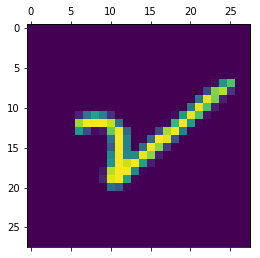

In [3]:
plt.matshow(mnist.data[15732].reshape(28, 28))

## Pre-processing

X / 255: color space value range

In [5]:
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## MLP (Muitl-Layer Perceptron)

In [6]:
## alpha: L2 penalty (regularization term) parameter
## solver: stochastic gradient descent
## tol: Tolerance for the optimization (two consecutive iterations 동안 이보다 작게 안내려가면 stop)
## learning_rate_init: The initial learning rate (step-size in updating the weights)

mlp = MLPClassifier(hidden_layer_sizes=(25), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

## MLP (Multi-Layer Perceptron)

In [7]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.34820779
Iteration 2, loss = 0.17950418
Iteration 3, loss = 0.14090178
Iteration 4, loss = 0.12226362
Iteration 5, loss = 0.11216709
Iteration 6, loss = 0.10319811
Iteration 7, loss = 0.09573605
Iteration 8, loss = 0.09144748
Iteration 9, loss = 0.08644480
Iteration 10, loss = 0.08288457


C:\Users\Jinhe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

## Score

In [8]:
print("Training set score: %f" % mlp.score(X_train, y_train))

Training set score: 0.979017


In [9]:
_url = "https://newcomer0602.azurewebsites.net/api/HttpTriggerPython31?code=8OKc0Ou3GTuFrZG1LvTeR1jv82agnCF0NnSu7oAFamIGtVTYEOgGXQ=="

In [10]:
json = {
    "name": "jinheon",
    "score": mlp.score(X_test, y_test)
}

In [11]:
req = requests.request('POST', _url, json = json)
req.json()

'Hi jinheon! Please try again, your test set score is 0.9653'

## Visualization of MLP weights on MNIST

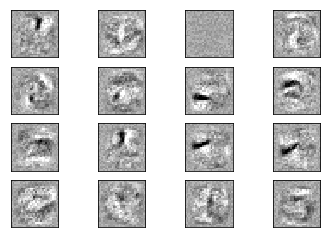

In [12]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()